In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import os
import cv2


os.chdir('/content/drive/MyDrive/Projects/PCA')

In [76]:
!unzip '/content/drive/MyDrive/Projects/PCA/cwang.zip'

Archive:  /content/drive/MyDrive/Projects/PCA/cwang.zip
   creating: cwang/
  inflating: cwang/cwang.1.jpg       
  inflating: cwang/cwang.10.jpg      
  inflating: cwang/cwang.11.jpg      
  inflating: cwang/cwang.12.jpg      
  inflating: cwang/cwang.13.jpg      
  inflating: cwang/cwang.14.jpg      
  inflating: cwang/cwang.15.jpg      
  inflating: cwang/cwang.16.jpg      
  inflating: cwang/cwang.17.jpg      
  inflating: cwang/cwang.18.jpg      
  inflating: cwang/cwang.19.jpg      
  inflating: cwang/cwang.2.jpg       
  inflating: cwang/cwang.20.jpg      
  inflating: cwang/cwang.3.jpg       
  inflating: cwang/cwang.4.jpg       
  inflating: cwang/cwang.5.jpg       
  inflating: cwang/cwang.6.jpg       
  inflating: cwang/cwang.7.jpg       
  inflating: cwang/cwang.8.jpg       
  inflating: cwang/cwang.9.jpg       


In [77]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')


In [78]:
import glob
X = []
Y = []

for image in glob.glob('/content/drive/MyDrive/Projects/PCA/wnm/9336923/*.jpg'):
  image = cv2.imread(image,0)
  X.append(image)
  Y.append(0)

for image in glob.glob('/content/drive/MyDrive/Projects/PCA/wnm/ambarw/*.jpg'):
  image = cv2.imread(image,0)
  X.append(image)
  Y.append(1)

for image in glob.glob('/content/drive/MyDrive/Projects/PCA/wnm/anpage/*.jpg'):
  image = cv2.imread(image,0)
  X.append(image)
  Y.append(2)

for image in glob.glob('/content/drive/MyDrive/Projects/PCA/wnm/cwang/*.jpg'):
  image = cv2.imread(image,0)
  X.append(image)
  Y.append(3)




In [79]:
import numpy as np
x = np.array(X)
y = np.array(Y)
print(len(X))
print(len(Y))
print(x.shape)
print(y.shape)

79
79
(79, 200, 180)
(79,)


In [80]:
y = y.reshape(79,1)

In [81]:
x = x.reshape(79,-1)

In [82]:
print(x.shape)

(79, 36000)


In [83]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)

pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
X_red = []

x = list(x)

for image in x:
  image = np.array(image)
  image = image.reshape(1,-1)
  trans = pca.transform(image)
  X_red.append(trans)

In [85]:
print(X_red)

[array([[-571.72424017, 5356.57350325]]), array([[-539.65190336, 5669.28583431]]), array([[-503.82091894, 5782.15431109]]), array([[-773.43003797, 5568.68759889]]), array([[-808.16408287, 5724.13338408]]), array([[-819.22160943, 5844.06657503]]), array([[-732.82378292, 5804.01232465]]), array([[-671.70539611, 5870.75731659]]), array([[-655.33849181, 5883.49270196]]), array([[-647.934151  , 5915.95072168]]), array([[-638.51604436, 5771.5728521 ]]), array([[-657.06400085, 5781.90569609]]), array([[-654.57500074, 5849.17424929]]), array([[-648.34316395, 5917.76541143]]), array([[-691.78301899, 5880.22864372]]), array([[-667.51104397, 5863.70032859]]), array([[-541.62452449, 5577.65050806]]), array([[-490.02644332, 5604.98252382]]), array([[-622.96868834, 5588.1217895 ]]), array([[-609.82878838, 5495.71481511]]), array([[-8864.77529656, -4853.05774097]]), array([[-8939.34290409, -4781.38671282]]), array([[-8863.66504349, -5006.21388239]]), array([[-8758.4605802 , -4965.10650869]]), array([

In [86]:
x1 = [i[0][0]/1000 for i in X_red[:20]]
y1 = [i[0][1]/1000 for i in X_red[:20]]

x2 = [i[0][0]/1000 for i in X_red[20:40]]
y2 = [i[0][1]/1000 for i in X_red[20:40]]

x3 = [i[0][0]/1000 for i in X_red[40:60]]
y3 = [i[0][1]/1000 for i in X_red[40:60]]

x4 = [i[0][0]/1000 for i in X_red[60:]]
y4 = [i[0][1]/1000 for i in X_red[60:]]

In [87]:
print(x1)
print(x2)
print(x3)
print(x4)
print('_'*20)
print(y1)
print(y2)
print(y3)
print(y4)

[-0.5717242401749856, -0.5396519033572509, -0.5038209189447165, -0.7734300379715785, -0.8081640828716379, -0.8192216094305885, -0.7328237829219288, -0.6717053961128435, -0.6553384918139774, -0.6479341509996103, -0.6385160443613765, -0.657064000854594, -0.6545750007376707, -0.6483431639492216, -0.691783018988131, -0.667511043967257, -0.5416245244871213, -0.4900264433189482, -0.622968688339829, -0.6098287883757596]
[-8.864775296557594, -8.939342904094849, -8.86366504349387, -8.758460580197914, -8.819250358359858, -8.93980497872924, -8.916431584071125, -8.91482453102537, -8.769699391489892, -8.689707660829045, -8.582539940102562, -8.61272488767555, -8.600279282625019, -8.611787518046196, -8.593078741636539, -8.54034659983899, -8.633789449557103, -8.444926676042616, -8.638049085589325, -8.371990044562377]
[9.707752036491385, 10.298141833654784, 10.327725997849827, 10.31697276100449, 10.284704870824218, 10.100322337222064, 10.088516322971525, 9.972964613781413, 10.07651543328961, 10.0475414

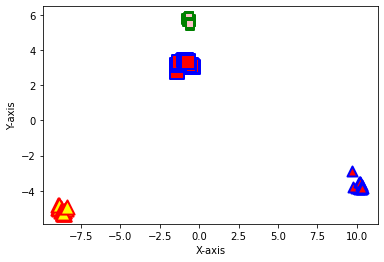

In [88]:
import matplotlib.pyplot as plt

plt.scatter(x1, y1, c ="pink", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
  
plt.scatter(x2, y2, c ="yellow",
            linewidths = 2,
            marker ="^", 
            edgecolor ="red", 
            s = 200)

plt.scatter(x3, y3, c ="red",
            linewidths = 2,
            marker ="^", 
            edgecolor ="blue", 
            s = 100)

plt.scatter(x4, y4, c ="red",
            linewidths = 2,
            marker ="s", 
            edgecolor ="blue", 
            s = 200)


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [90]:
X_red = np.array(X_red)

In [91]:
X_red = X_red.reshape(79,-1)

In [100]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state= 0)

In [101]:
dtc.fit(X_red,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Classes {0:'9336923',1:'ambraw',2:'anpage',3:'cwang'}

In [102]:
test_image = cv2.imread('/content/drive/MyDrive/Projects/PCA/cwang.12.jpg',0)

test_image = test_image.reshape(1,-1)
print(test_image.shape)

(1, 36000)


In [103]:
test_trans = pca.transform(test_image)

print(test_trans)

[[-770.0597161  3144.09315973]]


In [106]:
print(dtc.predict(test_trans))

[3]
